# 21M.387 Fundamentals of Music Processing
## Lab2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp
from fmplib.pyqueue import connect_to_queue

plt.rcParams['figure.figsize'] = (12, 4)
fmp.documentation_button()

## Exercise 1

Boolean arrays can pick subsets from vectors. Run and observe the code below to understand:
- Random arrays
- Boolean arrays
- Array indexing with boolean arrays
- Counting items

In [2]:
a = np.random.random(5)
b = np.arange(9)
c = np.array([True, False, True, False, False, True, True, False, False])

print('random array =', a)
print('b > 4 = ', b > 4)
print('b[c] = ', b[c])
print( np.count_nonzero(c))

random array = [0.15898491 0.37047742 0.5495843  0.94599531 0.52181564]
b > 4 =  [False False False False False  True  True  True  True]
b[c] =  [0 2 5 6]
4


Now do this:
- Create a vector `x` of length 30 with random numbers in the range $[-1.0, 1.0)$. Note that `np.random.random` returns numbers in the range $[0.0, 1.0)$.

- Make a stem plot of `x` using `plt.stem()` - [See Docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.stem).
- Create 3 vector subsets of `x`:
  - `y1` = all numbers in `x` greater than 0.5.
  - `y2` = all numbers in `x` less than -0.5.
  - `y3` = all numbers in `x` in between -0.5 and 0.5. For this, you will need `np.logical_and()`
- plot `y1`, `y2`, `y3` on three different figures using differently colored circle markers using the `markerfmt` optional arg. [The plt.plot docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) show the marker type and marker color options.

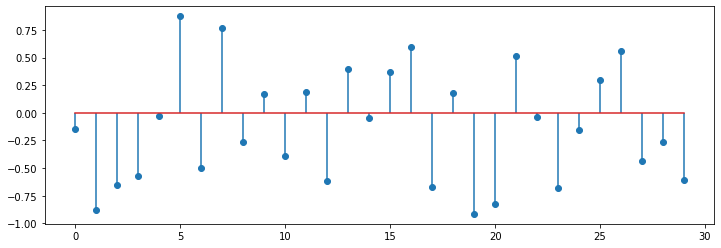

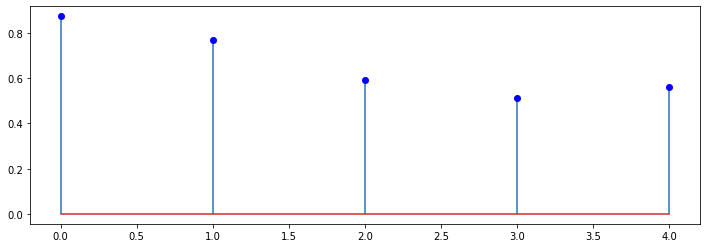

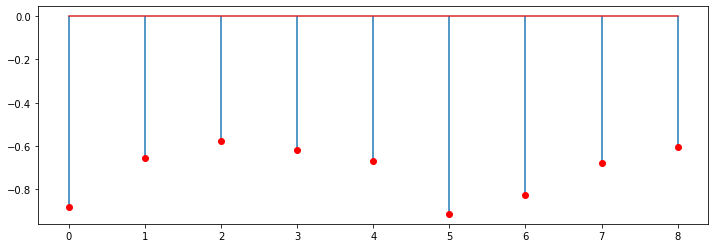

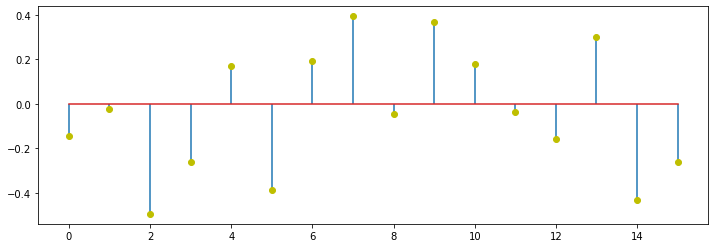

In [21]:
def scale(y):
    return (2 * y) - 1.0

x = np.random.random(30)
x = scale(x)

plt.stem(x)
plt.show()

y1 = x[x > 0.5]
plt.stem(y1, markerfmt='bo')
plt.show()

y2 = x[x < -0.5]
plt.stem(y2, markerfmt='ro')
plt.show()

y3 = x[np.logical_and(x > -0.5, x < 0.5)]
plt.stem(y3, markerfmt='yo')
plt.show()

In [4]:
connect_to_queue()

## Exercise 2

Load ~10 seconds from an audio file on your computer into array `x`:
- Use Audacity to load any audio file
- Trim to 10 seconds
- Change the Sample Rate to 22050
- Convert from Stereo to Mono
- Export as WAV

Recall that the total energy in a signal $x[n]$ of length $N$ is:
$$ E = \sum_{n=0}^{N-1} x[n]^2 $$

- Calculate the total energy for `x`.
- Calculate the average energy for `x`.

In [23]:
x = fmp.load_wav("clip.wav")

def total_energy(x):
    # could use the dot product instead: time it to see which is faster!
    return np.sum(x**2) 

def avg_energy(x):
    return total_energy(x)/len(x)

t = total_energy(x)
print(f'total energy={t}')
print(f'avg energy={avg_energy(x)}')

total energy=10117.167055932572
avg energy=0.045882843791077425


In [6]:
connect_to_queue()

## Exercise 3

Create an energy feature signal like we did in Lecture. 
Recall that the normalized energy signal is:
$$ \bar E^x[m] = \frac{1}{N} \sum_{n=mH}^{mH+N-1} x[n]^2 \text{ for } m \in [0, M-1] $$

with parameters:  
- $x$: the signal of length $L$
- $N$: window length
- $H$: hop size


The strategy for this algorithm is:
- calculate $M$
- create an empty energy array of length $M$
- in a `for` loop, calculate each value for $E[m]$ and assign it to the proper location in the energy array.
- return the array.

Plot the energy result. Try different values for $N$ and $H$ and find two that seem to work well.

22050
e=[0.03822781 0.02486527 0.02133551 0.01985984 0.03160512 0.048185
 0.04692937 0.05924117 0.06066605 0.04782383 0.04650532 0.05837385
 0.06029916 0.04874573 0.05078969 0.05289454 0.04546182 0.04645548
 0.05700857 0.06339014]


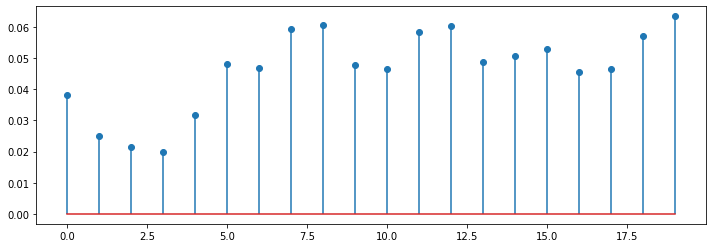

In [24]:
def calc_energy_feature(x, win_len, hop_size):
    M = int(np.ceil(len(x) / hop_size))
    m = np.zeros(M)
    for i in range(M):
        w = x[i*hop_size:i*hop_size+win_len]
        m[i] = avg_energy(w)
    return m

w_len = int(len(x) / 10)
h_len = int(w_len / 2)
print(w_len)
e = calc_energy_feature(x, w_len, h_len)
print(f'e={e}')

#plt.stem(x)
#plt.show()

plt.stem(e)
plt.show()

In [8]:
connect_to_queue()

## Exercise 4

We now convert the energy signal into a _Energy Novetly Function_ (ENF):

$$\Delta[n] = \vert E[n+1] - E[n] \vert_{\ge 0}$$

In other words, take the discrete-time derivative of $E[n]$. Then, set all negative values to 0. This can be done  by using boolean indexing as shown in the example below.

- Create the ENF based on the forumla above
- Plot it for the energy of $x[n]$

[99 99 99 99 99  5  6  7]


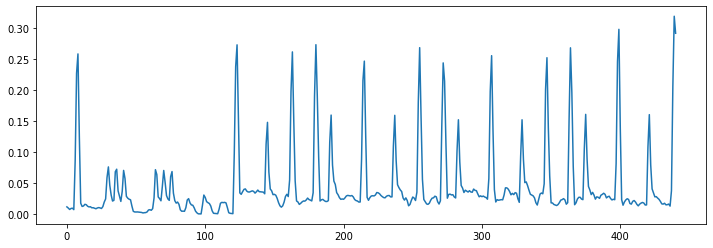

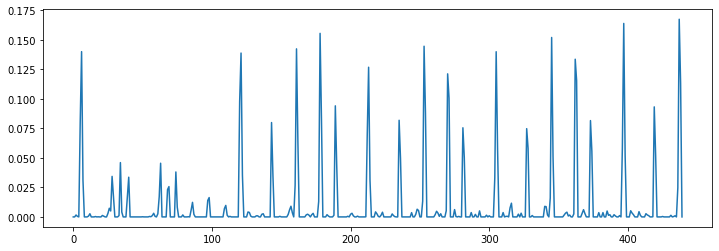

In [9]:
a = np.arange(8)
a[a < 5] = 99
print(a)

# calculate the energy novelty function from an energy feature signal
def calc_enf(x):
    e = np.diff(x)
    e[e < 0] = 0
    return e

# after trying a few values:
win_len = 1000
hop_size = 500
e = calc_energy_feature(x, win_len, hop_size)
enf = calc_enf(e)

plt.plot(e)
plt.show()

plt.plot(enf)
plt.show()

In [10]:
connect_to_queue()

## Exercise 5

Hopefully, your ENF plot has a number of sharp peaks. To find the locations of these peaks, we use the peak detection function below.

- Use `fmp.find_peaks(x, thresh)` to locate the peaks of your ENF.
- Plot the peaks on top of the ENF. There are a few ways to visualize peaks. I like placing a red circle at the peak location. `plt.plot(xs, ys, 'ro')` will place a red 'o' at the locations specified by `xs` and `ys` (a point at `(xs[0], ys[0])`, `(xs[1], ys[1])`, etc...). 
- Run the code several times with different values for `thresh` so that you get "just the good peaks".


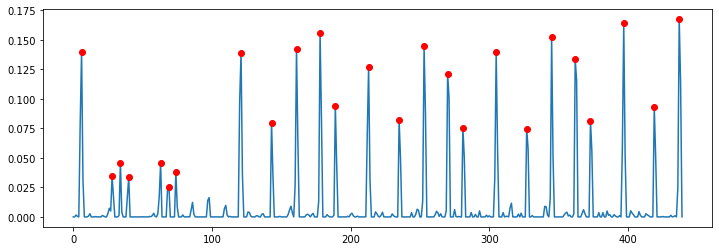

In [11]:
plt.plot(enf)

xs = fmp.find_peaks(enf, 0.1)
ys = [enf[i] for i in xs]
plt.plot(xs, ys, 'ro')

In [12]:
connect_to_queue()

## Exercise 6

Now that we have good peak locations for onsets, we will synthesize a click track corresponding to the peaks.

Create a function `sonify(locs, snd)` which will place copies of the waveform `snd` at each location specified by `locs`.
- Create an output array of zeros (`np.zeros`) of the appropriate length. 
- Loop through each sample in `locs` and add `snd` into the proper location of the output array.
- Important: the `locs` array must be in units of the sample rate (22050). But the peaks you generated are sampled at a different rate.

You can listen to the resulting clicks with `Audio()`.  

Even better is listening to the original audio `x` and the click track at the same time. To do that, provide a list of two arrays to `Audio()`, and you will hear each array from a different speaker. Note that both arrays must be of the same length.


In [17]:
fs = 22050
click_wav = fmp.load_wav('audio/click.wav')

def sonify(locs, snd):
    out = np.zeros(len(x))
    for loc in locs:
        pos = int(loc * hop_size)
        out[pos:pos+len(snd)] += snd
    return out

x_with_clicks = (x / 10) + sonify(xs, click_wav)
y = sonify(xs, click_wav)

print('clicks:')
ipd.display(ipd.Audio(y, rate=fs))
print('audio with clicks:')
ipd.display(ipd.Audio(x_with_clicks, rate=fs))

#plt.plot(y)
#plt.plot(x)

clicks:


audio with clicks:


You may now do a checkoff, but continue on to Exercise 8 if you have time.

In [14]:
connect_to_queue('checkoff')

## Exercise 7

If you listen very carefully, you may notice that the click sounds are a tiny bit off from the music. If you can't hear this, increase `win_len` to make the effect more pronounced.

Why are the click sounds a bit off? How can this be fixed? 

Try making some adjustments in the code to fix this issue.

In [27]:
# we can use window centering to remove the unwanted offset in the click sounds:
def calc_energy_feature(x, win_len, hop_size):
    # pad the original sound at the beginning to get centered windows:
    x2 = np.pad(x, int(win_len/2), mode='constant')
    M = int(np.ceil(len(x2) / hop_size))
    m = np.zeros(M)
    for i in range(M):
        w = x2[i*hop_size:i*hop_size+win_len]
        m[i] = avg_energy(w)
    return m

x_with_clicks = (x / 10) + sonify(xs, click_wav)
y = sonify(xs, click_wav)

print('clicks:')
ipd.display(ipd.Audio(y, rate=fs))
print('audio with clicks using window centering:')
ipd.display(ipd.Audio(x_with_clicks, rate=fs))

clicks:


audio with clicks using window centering:
